In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat, savemat
from scipy.interpolate import interp1d

def db2mag(db): return np.power(10, db/20)

In [23]:
global_address = r"C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Data\Power_sweep\Fitted_data" 
sample_folders = os.listdir(global_address)
for i in range(len(sample_folders)):
    if ".PNG" in sample_folders[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_folders[i]) 

[0] -----------> S11W6
[1] -----------> S18W11
[2] -----------> S5W2.7
[3] -----------> S7W4


<div style="text-align: center; font-size: 45px; color: blue;">
    S18W11
</div>

In [24]:
sample = 1
sample_address = global_address+"\\"+sample_folders[sample]
sample_measurements = os.listdir(sample_address)
for i in range(len(sample_measurements)):
    if ".PNG" in sample_measurements[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_measurements[i]) 

[0] -----------> 20db_room_att
[1] -----------> High_power


In [25]:
%matplotlib inline

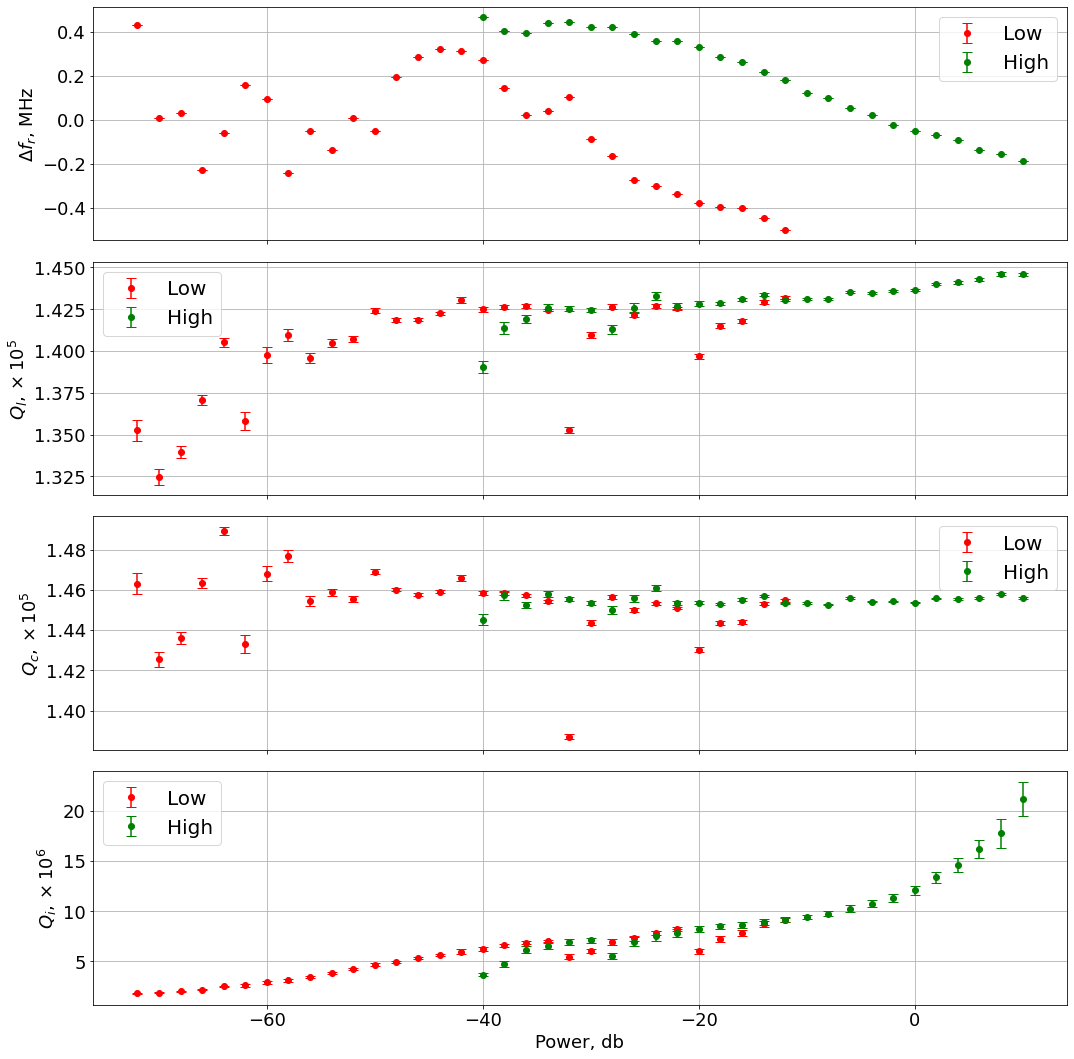

In [32]:
resonator = 5

plt.rcParams.update({
    "font.size": 16,          # General font size
    "axes.labelsize": 18,     # X and Y labels
    "axes.titlesize": 20,     # Title size
    "xtick.labelsize": 18,    # X-axis tick labels
    "ytick.labelsize": 18,    # Y-axis tick labels
    "legend.fontsize": 20,    # Legend font size
})

file_address = sample_address+"\\"+sample_measurements[0]+"\\"+"Circlefit_res_" + str(resonator+1) + ".mat"
mat = loadmat(file_address)

resonanse_freq_low_p = mat['resonanse_freq'][0]
resonanse_ql_low_p = mat['resonanse_ql'][0] 
resonanse_qc_low_p = mat['resonanse_qc'][0]
resonanse_qi_low_p = mat['resonanse_qi'][0]
resonanse_freq_err_low_p = mat['resonanse_freq_err'][0]
resonanse_ql_err_low_p = mat['resonanse_ql_err'][0]
resonanse_qc_err_low_p = mat['resonanse_qc_err'][0]
resonanse_qi_err_low_p = mat['resonanse_qi_err'][0]

good_powers_low_p = mat['good_powers'][0]

file_address = sample_address+"\\"+sample_measurements[1]+"\\"+"Circlefit_res_" + str(resonator) + ".mat"
mat = loadmat(file_address)

resonanse_freq_high_p = mat['resonanse_freq'][0]
resonanse_ql_high_p = mat['resonanse_ql'][0] 
resonanse_qc_high_p = mat['resonanse_qc'][0]
resonanse_qi_high_p = mat['resonanse_qi'][0]
resonanse_freq_err_high_p = mat['resonanse_freq_err'][0]
resonanse_ql_err_high_p = mat['resonanse_ql_err'][0]
resonanse_qc_err_high_p = mat['resonanse_qc_err'][0]
resonanse_qi_err_high_p = mat['resonanse_qi_err'][0]

good_powers_high_p = mat['good_powers'][0]

plt.rcParams.update({'font.size': 14})

low_p_freq = np.mean(resonanse_freq_low_p[:10])
                     
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 15), sharex = True) 
ax[0].errorbar(good_powers_low_p, (resonanse_freq_low_p-low_p_freq)/1e9*1e6, yerr=resonanse_freq_err_low_p/low_p_freq, fmt='o', label='Low', color='red', capsize=5)
ax[0].errorbar(good_powers_high_p, (resonanse_freq_high_p-low_p_freq)/1e9*1e6, yerr=resonanse_freq_err_high_p/low_p_freq, fmt='o', label='High', color='green', capsize=5)
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel(r'$\Delta f_r$, MHz')


ax[1].grid()
ax[1].errorbar(good_powers_low_p, resonanse_ql_low_p/1e5, yerr=resonanse_ql_err_low_p/1e5, fmt='o', label='Low', color='red', capsize=5)
ax[1].errorbar(good_powers_high_p, resonanse_ql_high_p/1e5, yerr=resonanse_ql_err_high_p/1e5, fmt='o', label='High', color='green', capsize=5)
ax[1].legend()
ax[1].set_ylabel(r'$Q_l,  \times 10^{5}$')

ax[2].grid()
ax[2].errorbar(good_powers_low_p, resonanse_qc_low_p/1e5, yerr=resonanse_qc_err_low_p/1e5, fmt='o', label='Low', color='red', capsize=5)
ax[2].errorbar(good_powers_high_p, resonanse_qc_high_p/1e5, yerr=resonanse_qc_err_high_p/1e5, fmt='o', label='High', color='green', capsize=5)
ax[2].legend()
ax[2].set_ylabel(r'$Q_c, \times 10^{5}$')


ax[3].grid()
ax[3].errorbar(good_powers_low_p, resonanse_qi_low_p/1e6, yerr=resonanse_qi_err_low_p/1e6, fmt='o', label='Low', color='red', capsize=5)
ax[3].errorbar(good_powers_high_p, resonanse_qi_high_p/1e6, yerr=resonanse_qi_err_high_p/1e6, fmt='o', label='High', color='green', capsize=5)
ax[3].legend()
ax[3].set_ylabel(r'$Q_i, \times 10^{6}$')
ax[3].set_xlabel(r'Power, db')

plt.tight_layout()
plt.show()